In [ ]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Srushti-S/Innomatics_Research_Labs_Internship/main/Data%20Analysis/Task%202/diminos_data.csv")
data.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [ ]:
data.describe()

,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [ ]:
data.shape

(15000, 3)

In [ ]:
data.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

#Feature Engineering 


In [ ]:
data['order_placed_at']=pd.to_datetime(data['order_placed_at'])

data['order_delivered_at']=pd.to_datetime(data['order_delivered_at'])

In [ ]:
data['time_taken_forDelivery'] = data['order_delivered_at'] - data['order_placed_at']

data['time_taken_forDelivery'] = data['time_taken_forDelivery']/np.timedelta64(1,'m')

In [ ]:
data.dtypes

order_id                           int64
order_placed_at           datetime64[ns]
order_delivered_at        datetime64[ns]
time_taken_forDelivery           float64
dtype: object

In [ ]:
data['order_placedDate']=data['order_placed_at'].dt.date

data['order_placedTime']=data['order_placed_at'].dt.time

data['order_deliveredDate']=data['order_delivered_at'].dt.date

data['order_deliveredTime']=data['order_delivered_at'].dt.time

In [ ]:
data.head()

,order_id,order_placed_at,order_delivered_at,time_taken_forDelivery,order_placedDate,order_placedTime,order_deliveredDate,order_deliveredTime
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056


Adding a new feature called timePeriod that will aid with delivery volume throughout different times of day.

In [ ]:
data['timePeriod'] = data['order_placed_at'].apply(lambda x: "Late_night" if x.hour > 1 and x.hour <= 4 else ("Morning" if x.hour > 4 and x.hour <= 12 else ("Afternoon" if x.hour > 12 and x.hour <= 16 else ("Evening" if x.hour > 16 and x.hour <=19 else "Night"))))

In [ ]:
data.head()

,order_id,order_placed_at,order_delivered_at,time_taken_forDelivery,order_placedDate,order_placedTime,order_deliveredDate,order_deliveredTime,timePeriod
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,Night
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,Night
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,Night
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,Night
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,Night


In [ ]:
data['timePeriod'].value_counts()

Morning       5002
Night         3785
Afternoon     2452
Evening       1889
Late_night    1872
Name: timePeriod, dtype: int64

Text(0.5, 1.0, 'Hist Plot for Time Period')

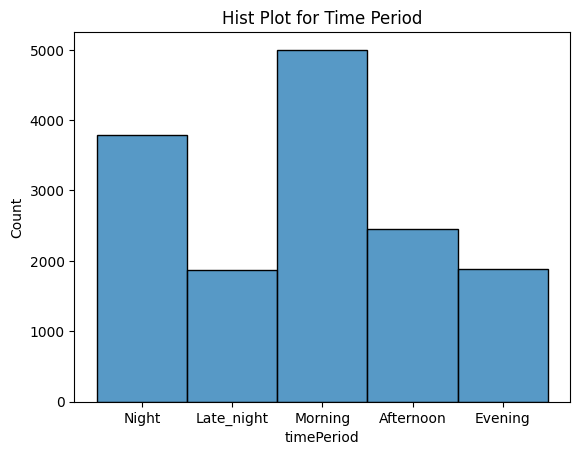

In [ ]:
sns.histplot(data['timePeriod'])
plt.title("Hist Plot for Time Period")

Insights:
* Approximately 5002 orders are placed between 4 a.m. and 12 p.m. (morning), followed by 2452 in the afternoon and 3785 at night


Conclusion:

 * More delivery boys can be assigned to the morning and afternoon shifts.

In [ ]:
data.drop(['order_placed_at', 'order_delivered_at'], axis=1, inplace=True)
data.head()

,order_id,time_taken_forDelivery,order_placedDate,order_placedTime,order_deliveredDate,order_deliveredTime,timePeriod
0,1523111,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,Night
1,1523112,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,Night
2,1523113,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,Night
3,1523114,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,Night
4,1523115,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,Night


In [ ]:
data.dtypes

order_id                    int64
time_taken_forDelivery    float64
order_placedDate           object
order_placedTime           object
order_deliveredDate        object
order_deliveredTime        object
timePeriod                 object
dtype: object

In [ ]:
data['order_placedDay'] =  pd.to_datetime(data['order_placedDate']).dt.day_name()

data['order_deliveredDay'] =  pd.to_datetime(data['order_deliveredDate']).dt.day_name()

In [ ]:
data.head()

,order_id,time_taken_forDelivery,order_placedDate,order_placedTime,order_deliveredDate,order_deliveredTime,timePeriod,order_placedDay,order_deliveredDay
0,1523111,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,Night,Wednesday,Wednesday
1,1523112,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,Night,Wednesday,Wednesday
2,1523113,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,Night,Wednesday,Wednesday
3,1523114,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,Night,Wednesday,Wednesday
4,1523115,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,Night,Wednesday,Wednesday


Insights:

* In any case, delivery time will never exceed 2 hours. However, if a consumer places an order at 23.50, delivery will be made the following day, which is why we established the order_delivered_day feature; otherwise, the order_placed_day feature is sufficient.

In [ ]:
data['order_placedDay'].value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: order_placedDay, dtype: int64

Text(0.5, 1.0, 'Hist Plot for Day of Order Placed')

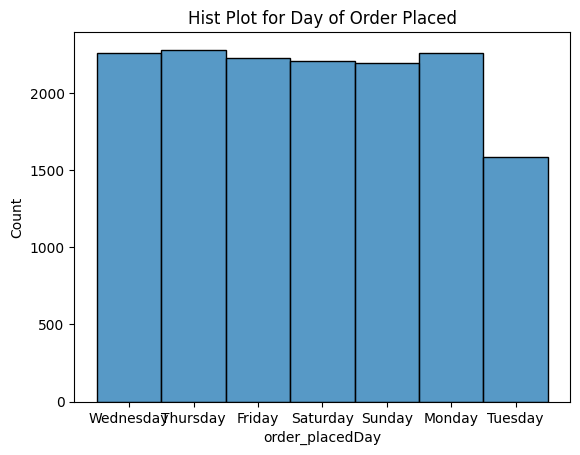

In [ ]:
sns.histplot(data['order_placedDay'])
plt.title("Hist Plot for Day of Order Placed")

Insights:

* Except for *Tuesday*, every other day has around the same number of orders placed. So to overcome that we can provide a discount to clients in order to increase orders on that day or have some Tuesday Sale for the same.

In [ ]:
data['time_taken_forDelivery'].min()

15.000010333333334

In [ ]:
data['time_taken_forDelivery'].max()

7299.831374933333

In [ ]:
data['time_taken_forDelivery'].mean()

20.49938932646778

In [ ]:
data['time_taken_forDelivery'].median()

15.797986066666667

Text(0.5, 1.0, 'Dist Plot for Delivery Time')

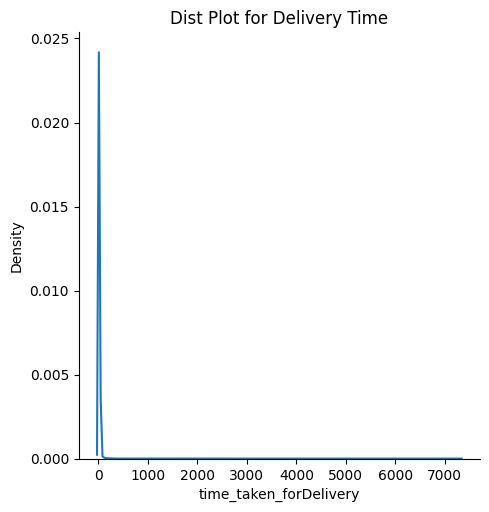

In [ ]:
sns.displot(data['time_taken_forDelivery'], kind='kde')
plt.title("Dist Plot for Delivery Time")

Text(0.5, 1.0, 'Box Plot for Delivery Time')

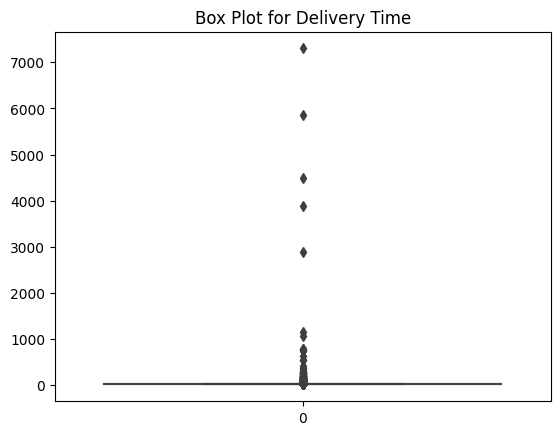

In [ ]:
sns.boxplot(data['time_taken_forDelivery'])
plt.title("Box Plot for Delivery Time")

In [ ]:
cnt=0

for i in data['time_taken_forDelivery']:
  if i > 30.00:
    cnt=cnt+1

print(f"Out of 15,000 deliveries '{cnt}' deliveries are late!")
    

Out of 15,000 deliveries '604' deliveries are late!


In [ ]:
pd.set_option("display.max.rows", None)
data[data['time_taken_forDelivery']>1440]

,order_id,time_taken_forDelivery,order_placedDate,order_placedTime,order_deliveredDate,order_deliveredTime,timePeriod,order_placedDay,order_deliveredDay
4165,1527276,5867.434753,2023-03-08,09:46:43,2023-03-12,11:34:09.085175,Morning,Wednesday,Sunday
5499,1528610,7299.831375,2023-03-10,17:06:22,2023-03-15,18:46:11.882496,Evening,Friday,Wednesday
10007,1533118,2883.124250,2023-03-19,00:56:34,2023-03-21,00:59:41.454974,Night,Sunday,Tuesday
10225,1533336,4485.891210,2023-03-19,11:07:32,2023-03-22,13:53:25.472592,Morning,Sunday,Wednesday
14155,1537266,3888.444088,2023-03-26,09:54:24,2023-03-29,02:42:50.645252,Morning,Sunday,Wednesday


Insights: 

* The average time for one delivery is 20.49 minutes. 
* There are 5 deliveries that took more than 1 day of time to be delivered (whihc is not good sir). 
* The fastest order was delivered in 15 minutes (the shortest time for one delivery) and the longest time for one delivery was 7299 minutes. (might be a chance this order is placed through IRCTC service and the delivery is missed after next station avalible dominos restaurant delivered the order)
* Since, 95% of deliveries are completed on time, its is beneficial to you, sir.
* 4.02% of deliveries are late, which is fewer than the percentage of deliveries provided on time.

#The Final Report:

* The majority of orders (5002) are placed between 4 a.m. and 12 p.m. 
* Except for Tuesday, all other days have approximately the same number of orders placed 
* The average time taken for a single delivery is 20.49 minutes 
* 95% of orders are delivered on time, which is fantastic but there are 5 deliveries that took more than one day to deliver.


#Conclusion:

* We can add extra delivery boys in the morning and afternoon as the number of orders increases 
* We can offer a discount on Tuesday or have some Tuesday Sale to increase the number of orders

Overall the shop seems running well Sir, Kudos to you :)
